# DATA ANALYSIS USING PYTHON

### 1)  Reading a csv file

In [1]:
import unicodecsv
with open(r'C:\Users\Harsh\Desktop\daily_engagement.csv','rb') as file:
    reader = unicodecsv.DictReader(file)
    daily_engagement = list(reader)

daily_engagement

[OrderedDict([('account_key', '0'),
              ('utc_date', '2015-01-09'),
              ('num_courses_visited', '1.0'),
              ('total_minutes_visited', '11.6793745'),
              ('lessons_completed', '0.0'),
              ('projects_completed', '0.0')]),
 OrderedDict([('account_key', '0'),
              ('utc_date', '2015-01-10'),
              ('num_courses_visited', '2.0'),
              ('total_minutes_visited', '37.2848873333'),
              ('lessons_completed', '0.0'),
              ('projects_completed', '0.0')]),
 OrderedDict([('account_key', '0'),
              ('utc_date', '2015-01-11'),
              ('num_courses_visited', '2.0'),
              ('total_minutes_visited', '53.6337463333'),
              ('lessons_completed', '0.0'),
              ('projects_completed', '0.0')]),
 OrderedDict([('account_key', '0'),
              ('utc_date', '2015-01-12'),
              ('num_courses_visited', '1.0'),
              ('total_minutes_visited', '33.4892696667'),
  

In [2]:
with open(r'C:\Users\Harsh\Desktop\project_submissions.csv','rb') as file:
    reader = unicodecsv.DictReader(file)
    project_submissions = list(reader)
    
project_submissions

[OrderedDict([('creation_date', '2015-01-14'),
              ('completion_date', '2015-01-16'),
              ('assigned_rating', 'UNGRADED'),
              ('account_key', '256'),
              ('lesson_key', '3176718735'),
              ('processing_state', 'EVALUATED')]),
 OrderedDict([('creation_date', '2015-01-10'),
              ('completion_date', '2015-01-13'),
              ('assigned_rating', 'INCOMPLETE'),
              ('account_key', '256'),
              ('lesson_key', '3176718735'),
              ('processing_state', 'EVALUATED')]),
 OrderedDict([('creation_date', '2015-01-20'),
              ('completion_date', '2015-01-20'),
              ('assigned_rating', 'PASSED'),
              ('account_key', '256'),
              ('lesson_key', '3176718735'),
              ('processing_state', 'EVALUATED')]),
 OrderedDict([('creation_date', '2015-03-10'),
              ('completion_date', '2015-03-13'),
              ('assigned_rating', 'PASSED'),
              ('account_key', '

In [3]:
with open(r'C:\Users\Harsh\Desktop\enrollments.csv','rb') as file:
    reader = unicodecsv.DictReader(file)
    enrollments = list(reader)
    
enrollments

[OrderedDict([('account_key', '448'),
              ('status', 'canceled'),
              ('join_date', '2014-11-10'),
              ('cancel_date', '2015-01-14'),
              ('days_to_cancel', '65'),
              ('is_udacity', 'True'),
              ('is_canceled', 'True')]),
 OrderedDict([('account_key', '448'),
              ('status', 'canceled'),
              ('join_date', '2014-11-05'),
              ('cancel_date', '2014-11-10'),
              ('days_to_cancel', '5'),
              ('is_udacity', 'True'),
              ('is_canceled', 'True')]),
 OrderedDict([('account_key', '448'),
              ('status', 'canceled'),
              ('join_date', '2015-01-27'),
              ('cancel_date', '2015-01-27'),
              ('days_to_cancel', '0'),
              ('is_udacity', 'True'),
              ('is_canceled', 'True')]),
 OrderedDict([('account_key', '448'),
              ('status', 'canceled'),
              ('join_date', '2014-11-10'),
              ('cancel_date', '201

### 2) Updating Data Types

In [4]:
from datetime import datetime as dt
def parse_date(date):
    '''Convert string into date'''
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
def parse_maybe_int(i):
    '''Convert string into an integer'''
    if i == '':
        return None
    else:
        return int(i)
parse_date('2012-12-10')#a trial test case

datetime.datetime(2012, 12, 10, 0, 0)

In [5]:
# Updating data types of enrollments file:

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    

In [6]:
# updating data types of daily engagement file:

for engagement in daily_engagement:
    engagement['utc_date'] = parse_date(engagement['utc_date'])
    engagement['num_courses_visited'] = int(float(engagement['num_courses_visited']))
    engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])
    engagement['lessons_completed'] = int(float(engagement['lessons_completed']))
    engagement['projects_completed'] = int(float(engagement['projects_completed']))

    

In [7]:
# Updating data types of project_submissions file:
for project in project_submissions:
    project['creation_date'] = parse_date(project['creation_date'])
    project['completion_date'] = parse_date(project['completion_date'])

In [8]:
# check data types now:
print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '0'), ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0)])
OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)), ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


#### Note: I don't change the datatype of account_key because i don't need to do any arithmatic operation with that attribute.

### 3) Finding number of unique students in the data

In [9]:
def unique_std(x):
    '''Function to return unique number of students from data'''
    unique_set = set()
    for e in x:
        unique_set.add(e['account_key'])
    return unique_set

unique_enrollments = unique_std(enrollments)
unique_daily_engagement = unique_std(daily_engagement)
unique_project_submissions = unique_std(project_submissions)

In [11]:
print(len(unique_enrollments))
print(len(unique_daily_engagement))
print(len(unique_project_submissions))

1302
1237
743


### Renaming a column

In [10]:
### This function is only for renaming a column in your dataset(data_list)
'''def change_name(data_list,new_column_name,previous_column_name):
    for element in data_list:
        element[new_column_name] = element[previous_column_name]
        del(element[previous_column_name])'''

'def change_name(data_list,new_column_name,previous_column_name):\n    for element in data_list:\n        element[new_column_name] = element[previous_column_name]\n        del(element[previous_column_name])'

### As you can see the number of students in unique_daily_engagement is less than the number of students in unique_enrollments. It's a problem and we have to find how many more problem accounts are there in our data.

In [12]:
# finding the problem accounts
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_daily_engagement and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        print(enrollment)
num_problem_students

#these accounts was udacity test accounts

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


3

### As you can see these are udacity test accounts and we don't want these accounts in our data.

In [13]:
#finding all udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

### Removing all test accounts

In [14]:
def remove_udacity_accounts(data):
    '''this function will remove all the udacity test accounts from the dataset'''
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [15]:
non_udacity_enrollments = remove_udacity_accounts(enrollments) # removing test accounts from enrollments dataset
non_udacity_engagements = remove_udacity_accounts(daily_engagement)# removing test accounts from daily_engagement dataset
non_udacity_submissions = remove_udacity_accounts(project_submissions)# removing test accounts from project_submissions dataset

print(len(non_udacity_enrollments))
print(len(non_udacity_engagements))
print(len(non_udacity_submissions))

1622
135656
3634


In [16]:
#finding paid students
paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        paid_students[account_key] = enrollment_date
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
print(len(paid_students))        

995


In [17]:
def within_one_week(join_date, engagement_date):
    '''This function will return True if the value of time_delta is < 7 else False'''
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>=0

In [18]:
#function for removing trail accounts from dataset
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data
    

In [19]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagements = remove_free_trial_cancels(non_udacity_engagements)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)
print(len(paid_enrollments))
print(len(paid_engagements))
print(len(paid_submissions))

1293
134549
3618


In [20]:
for engagement_record in paid_engagements:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [21]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagements:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        
len(paid_engagement_in_first_week)

6920

In [22]:
from collections import defaultdict
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [23]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')


Populating the interactive namespace from numpy and matplotlib
Mean: 305.414718908
Standard Deviation: 405.91261032
Minimum: 0.0
Maximum: 3564.7332645


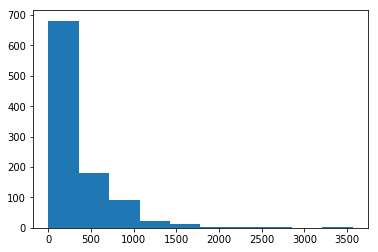

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
def describe_data(data):
    print('Mean:',np.array(list(data)).mean())
    print('Standard Deviation:',np.array(list(data)).std())
    print('Minimum:',np.array(list(data)).min())
    print('Maximum:',np.array(list(data)).max())
    plt.hist(data)



total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)


In [25]:
student_with_max_minutes = None
max_minutes = 0
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes>max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
max_minutes


3564.7332644989997

In [26]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

OrderedDict([('account_key', '163'), ('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('has_visited', 1)])
OrderedDict([('account_key', '163'), ('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('has_visited', 1)])
OrderedDict([('account_key', '163'), ('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('has_visited', 1)])
OrderedDict([('account_key', '163'), ('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('has_visited', 1)])
OrderedDict([('account_key', '163'), ('utc_date', datetime.datetime(2015

Mean: 1.63216080402
Standard Deviation: 3.00140182563
Minimum: 0
Maximum: 36


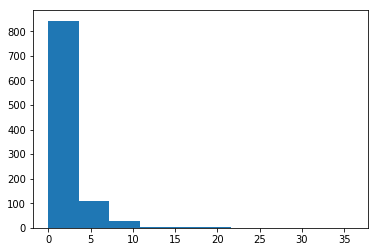

In [27]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')
describe_data(lessons_completed_by_account.values())

Mean: 2.91256281407
Standard Deviation: 2.22037005491
Minimum: 0
Maximum: 7


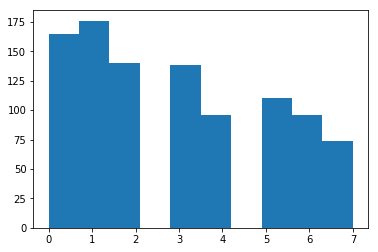

In [28]:
day_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(day_visited_by_account.values())

In [29]:
# finding all the students who have pass the project
subway_project_lesson_keys = ['746169184','3176718735']
pass_subway_project = set()
for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
        
len(pass_subway_project)

647

In [30]:
passing_engagement = []
non_passing_engagement = []
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
print(len(passing_engagement))
print(len(non_passing_engagement))

4528
2392


In [31]:
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')


non_passing_engagement:
Mean: 145.399341866
Standard Deviation: 268.97150373
Minimum: 0.0
Maximum: 1768.52274933
passing_engagement:
Mean: 391.481722325
Standard Deviation: 439.653061726
Minimum: 0.0
Maximum: 3564.7332645


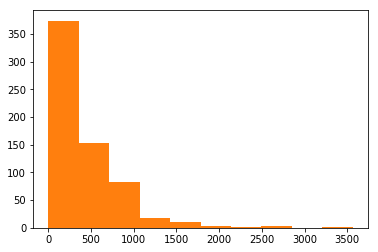

In [32]:
print('non_passing_engagement:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')
describe_data(non_passing_minutes.values())

print('passing_engagement:')
passing_minutes = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')
describe_data(passing_minutes.values())

non_passing_engagement:
Mean: 0.867816091954
Standard Deviation: 2.54833703959
Minimum: 0
Maximum: 27
passing_engagement:
Mean: 2.04327666151
Standard Deviation: 3.1428602763
Minimum: 0
Maximum: 36


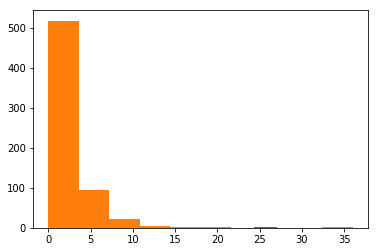

In [33]:
print('non_passing_engagement:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data(non_passing_lessons.values())

print('passing_engagement:')
passing_lessons = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
describe_data(passing_lessons.values())

non_passing_engagement:
Mean: 1.95114942529
Standard Deviation: 1.88929952676
Minimum: 0
Maximum: 7
passing_engagement:
Mean: 3.42967542504
Standard Deviation: 2.21298340866
Minimum: 0
Maximum: 7


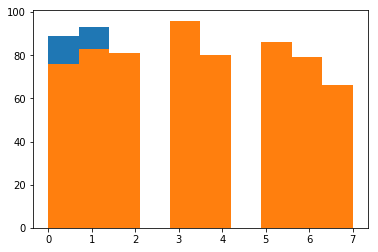

In [34]:
print('non_passing_engagement:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account,'has_visited')
describe_data(non_passing_visits.values())

print('passing_engagement:')
passing_visits = sum_grouped_items(passing_engagement_by_account,'has_visited')
describe_data(passing_visits.values())

Text(0.5,1,'Distribution of classroom visits in the first week for students who pass the subway project ')

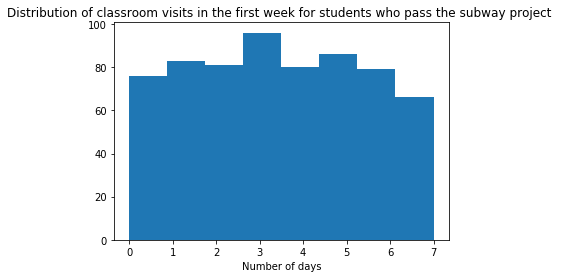

In [35]:
import seaborn as sns
plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week' +
           ' for students who pass the subway project ')

Text(0.5,1,'Distribution of classroom visits in the first week for students who donot pass the subway project ')

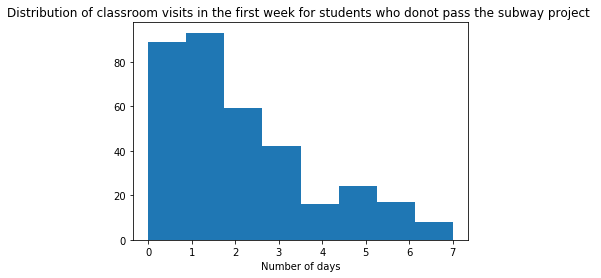

In [36]:
plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week' +
           ' for students who donot pass the subway project ')

# As you can see the number of students who pass the project are having more visits than the students who don't pass the project

# Now we can see after the analysis of the three datasets that there is a strong correlation between number of visits to classroom and passing the project by a student

# After a certain point i don't have given the explanation because i want you to understand it by your own and find something new in the data and tell me what else you find in the data. 